#Импорт библиотек, подготовка файла к работе

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
df = pd.read_csv('/content/Crime Prediction in Chicago_Dataset.csv')

#Общий анализ по данным в таблице

In [4]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12592454,JF113025,1/14/2022 15:55,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,16.0,68,26,1170805.0,1860170.0,2022,9/14/2023 15:41,41.771782,-87.649437,"(41.771782439, -87.649436929)"
1,12785595,JF346553,8/5/2022 21:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,...,5.0,69,17,1185135.0,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)"
2,12808281,JF373517,8/14/2022 14:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,39.0,11,17,1138383.0,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)"
3,12888104,JF469015,11/10/2022 3:47,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,17.0,68,15,1169903.0,1856822.0,2022,9/14/2023 15:41,41.762615,-87.652840,"(41.76261474, -87.652840463)"
4,13209277,JG422539,8/15/2022 9:00,0000X W JACKSON BLVD,810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,...,4.0,32,6,NaN,NaN,2022,9/14/2023 15:43,NaN,NaN,NaN


In [5]:
df.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
239553,27038,JF387886,9/8/2022 10:50,061XX N WINTHROP AVE,110,HOMICIDE,FIRST DEGREE MURDER,PORCH,True,False,...,48.0,77,01A,1167747.0,1940929.0,2022,12/29/2022 15:40,41.993457,-87.658318,"(41.993457327, -87.658318065)"
239554,26819,JF275138,6/10/2022 23:41,018XX S CANAL ST,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,25.0,31,01A,1173423.0,1891309.0,2022,9/19/2022 15:41,41.857173,-87.638918,"(41.857173304, -87.638917814)"
239555,26601,JF132803,2/3/2022 16:27,000XX E 100TH PL,110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,...,9.0,49,01A,1178641.0,1838358.0,2022,9/19/2022 15:41,41.711753,-87.621374,"(41.711753121, -87.621374343)"
239556,26857,JF290575,6/23/2022 2:25,027XX S KEDVALE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,22.0,30,01A,1149162.0,1885416.0,2022,9/1/2022 15:42,41.841506,-87.728122,"(41.841506072, -87.728122297)"
239557,27015,JF377220,8/31/2022 9:30,116XX S MICHIGAN AVE,110,HOMICIDE,FIRST DEGREE MURDER,GAS STATION,False,False,...,9.0,53,01A,1178927.0,1827627.0,2022,9/19/2022 15:41,41.682299,-87.620652,"(41.682299252, -87.620652127)"


In [6]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.395580e+05,239558.000000,239558.00000,239548.000000,239558.000000,2.348910e+05,2.348910e+05,239558.0,234891.000000,234891.000000
mean,1.273144e+07,1154.023276,11.31053,23.385029,36.268474,1.165381e+06,1.887038e+06,2022.0,41.845612,-87.668599
std,7.082019e+05,707.909870,7.07555,14.210565,21.553814,1.679375e+04,3.229564e+04,0.0,0.088833,0.061010
min,2.654300e+04,111.000000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00,2022.0,36.619446,-91.686566
25%,1.267802e+07,533.000000,5.00000,9.000000,22.000000,1.153949e+06,1.859284e+06,2022.0,41.769168,-87.710150
50%,1.276893e+07,1033.000000,10.00000,24.000000,32.000000,1.167256e+06,1.893383e+06,2022.0,41.863073,-87.661465
75%,1.285704e+07,1731.000000,17.00000,35.000000,53.000000,1.176856e+06,1.910066e+06,2022.0,41.909023,-87.626402
max,1.363051e+07,2535.000000,31.00000,50.000000,77.000000,1.205119e+06,1.951493e+06,2022.0,42.022548,-87.524532


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    239558 non-null  int64  
 1   Case Number           239558 non-null  object 
 2   Date                  239558 non-null  object 
 3   Block                 239558 non-null  object 
 4   IUCR                  239558 non-null  object 
 5   Primary Type          239558 non-null  object 
 6   Description           239558 non-null  object 
 7   Location Description  238593 non-null  object 
 8   Arrest                239558 non-null  bool   
 9   Domestic              239558 non-null  bool   
 10  Beat                  239558 non-null  int64  
 11  District              239558 non-null  int64  
 12  Ward                  239548 non-null  float64
 13  Community Area        239558 non-null  int64  
 14  FBI Code              239558 non-null  object 
 15  

In [8]:
df.isnull().sum() #Проверка на пустые значения

,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,965
Arrest,0
Domestic,0


In [9]:
df.duplicated().sum() #Проверка на отсутствие дубликатов

0

#Графики

In [10]:
df["Date"] = pd.to_datetime(df["Date"])

<ipython-input-24-43305cdc1cb6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, palette='magma').set_title('Распределение по месяцам')


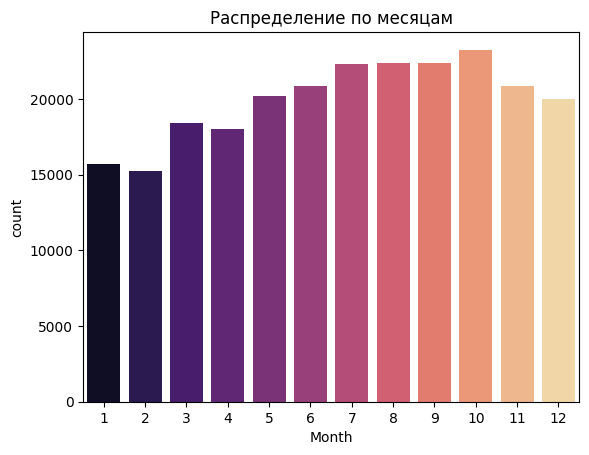

In [24]:
#Анализ преступлений по месяцам
df['Month'] = df['Date'].dt.month
sns.countplot(x='Month', data=df, palette='magma').set_title('Распределение по месяцам')
plt.show()

<ipython-input-25-499315591edb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='WeekDay', data=df, palette='magma').set_title('Распределение по дням недели')


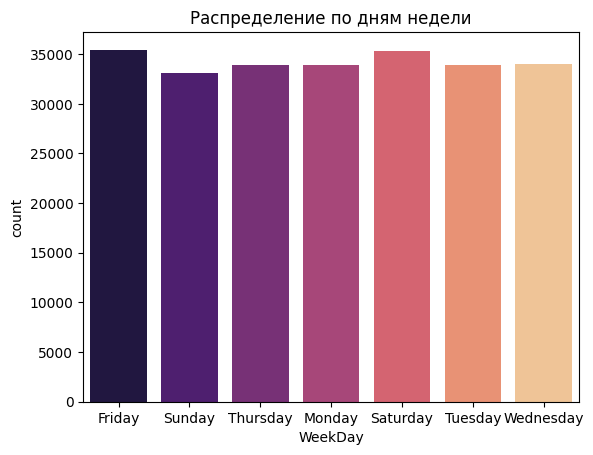

In [25]:
#Анализ преступлений по дням недели
df['WeekDay'] = df['Date'].dt.day_name()
sns.countplot(x='WeekDay', data=df, palette='magma').set_title('Распределение по дням недели')
plt.show()

<ipython-input-26-5a3b585d1037>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='magma').set_title('Распределение по часам')


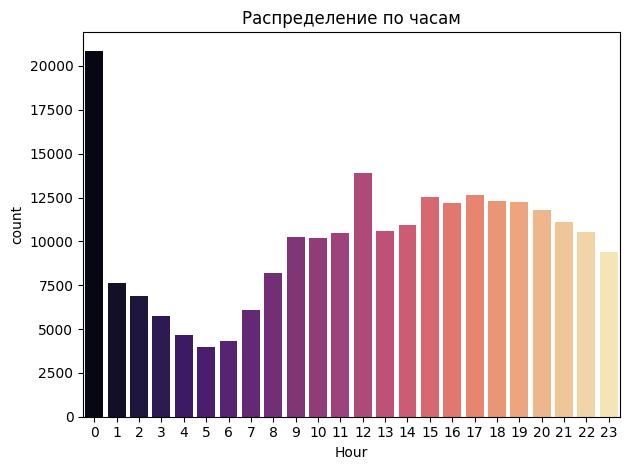

In [26]:
#Анализ преступлений по времени суток
df['Hour'] = df['Date'].dt.hour
sns.countplot(x='Hour', data=df, palette='magma').set_title('Распределение по часам')
plt.tight_layout()
plt.show()

In [28]:
#Условное деление на утро, день, вечер, ночь
def set_daytime(hour):
  if 23 <= hour or hour < 5:
    return 'Night'
  elif 5 <= hour < 12:
    return 'Morning'
  elif 12 <= hour < 17:
    return 'Afternoon'
  else:
    return 'Evening'

df['Time_of_Day'] = df['Hour'].apply(set_daytime)

<ipython-input-29-8bd7b0f13659>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_of_day_top.values, y=time_of_day_top.index, palette='magma').set_title('Распределение преступлений по времени суток')


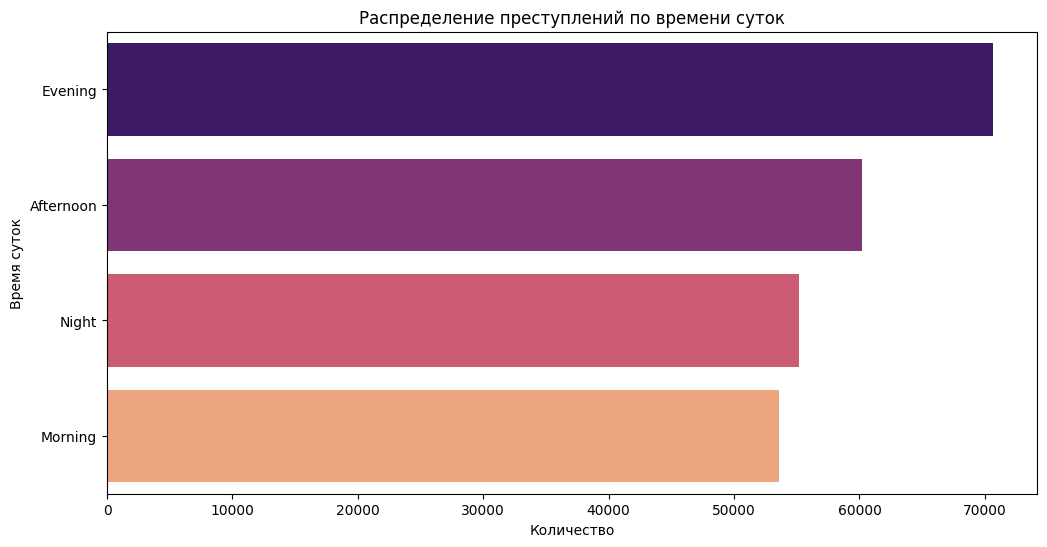

In [29]:
time_of_day_top = df['Time_of_Day'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=time_of_day_top.values, y=time_of_day_top.index, palette='magma').set_title('Распределение преступлений по времени суток')
plt.xlabel('Количество')
plt.ylabel('Время суток')
plt.show()

<ipython-input-30-7df543c350a9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=primary_type_top.values, y=primary_type_top.index, palette='magma').set_title('Топ 10 типов преступлений по их количеству')


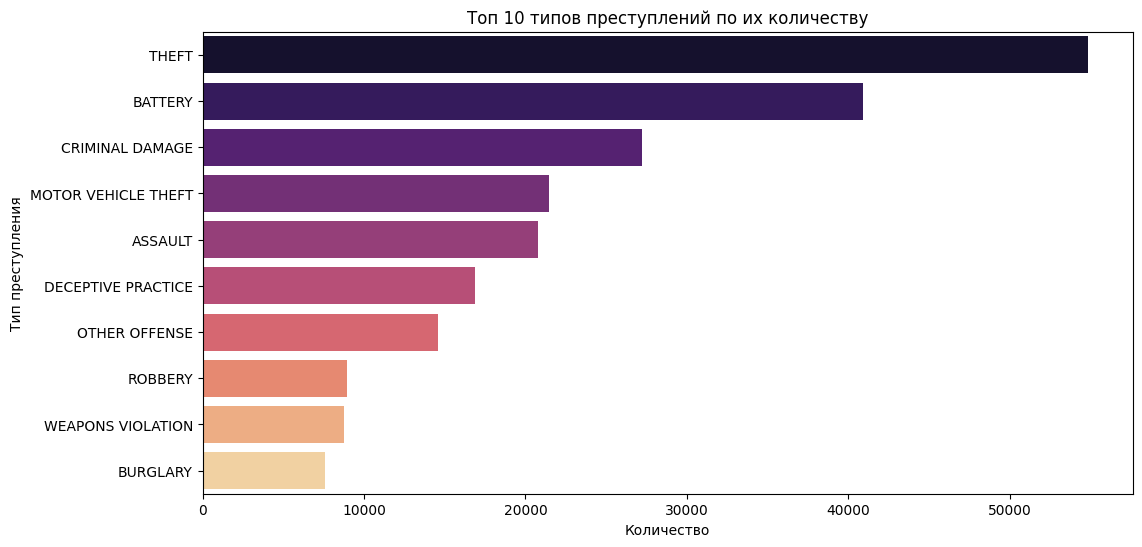

In [30]:
primary_type_top = df['Primary Type'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=primary_type_top.values, y=primary_type_top.index, palette='magma').set_title('Топ 10 типов преступлений по их количеству')
plt.xlabel('Количество')
plt.ylabel('Тип преступления')
plt.show()

<ipython-input-31-11c44509a05f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=description_top.values, y=description_top.index, palette='magma').set_title('Топ 10 типов описаний преступлений по их количеству')


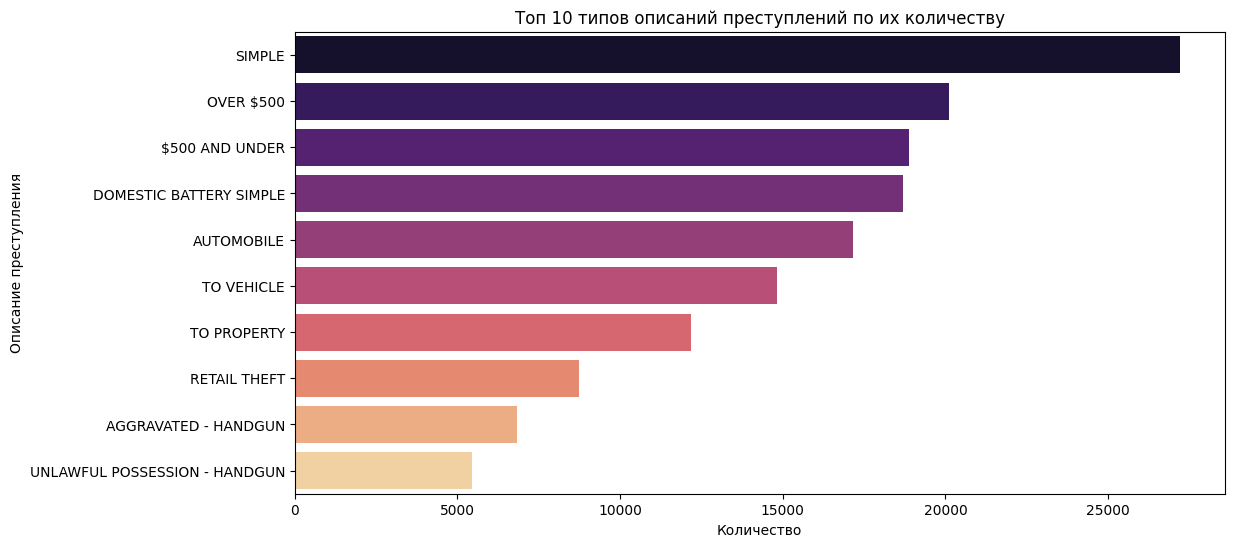

In [31]:
description_top = df['Description'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=description_top.values, y=description_top.index, palette='magma').set_title('Топ 10 типов описаний преступлений по их количеству')
plt.xlabel('Количество')
plt.ylabel('Описание преступления')
plt.show()

<ipython-input-32-30ed99959177>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Arrest', data=df, palette='magma').set_title('Соотношение арестов к избежавшим наказания')


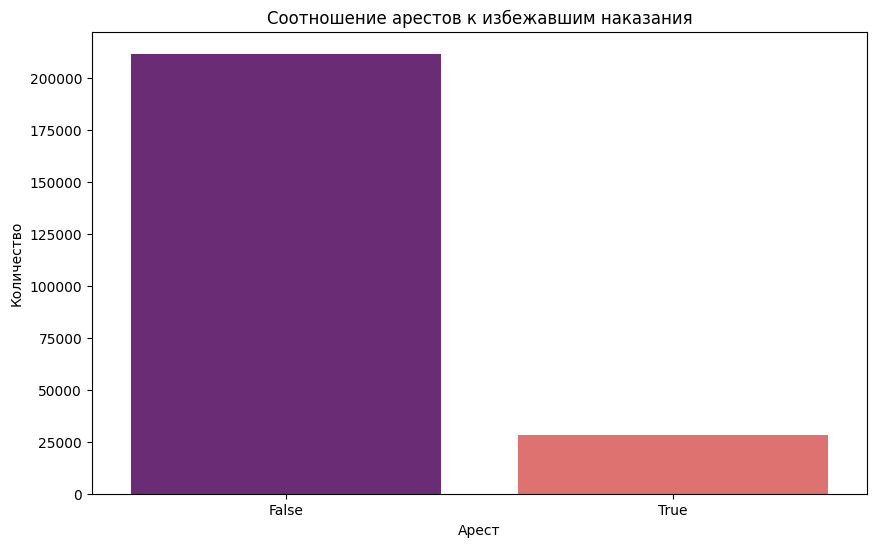

In [32]:
arrest_ratio = df['Arrest'].value_counts()

plt.figure(figsize=(10,6))
sns.countplot(x='Arrest', data=df, palette='magma').set_title('Соотношение арестов к избежавшим наказания')
plt.xlabel('Арест')
plt.ylabel('Количество')
plt.show()

#Цифры

In [33]:
arrest_ratio_value = df['Arrest'].sum() / df.shape[0] * 100
print(f'{round(arrest_ratio_value, 2)}% преступников поймано')

11.71% преступников поймано


In [34]:
#Предположение о том, что для преступлений совершенных ночью арестов меньше (из-за плохой видимости или др. факторов)
arrest_by_time = df.groupby('Time_of_Day')['Arrest'].mean() * 100
print(arrest_by_time)

Time_of_Day
Afternoon    11.488789
Evening      13.983123
Morning      10.536824
Night        10.182332
Name: Arrest, dtype: float64


In [35]:
#Соотношение количества каждого преступления ко всем преступлениям
crime_ratio = df['Primary Type'].value_counts() / df.shape[0] * 100
print(round(crime_ratio,2))

Primary Type
THEFT                                22.91
BATTERY                              17.09
CRIMINAL DAMAGE                      11.37
MOTOR VEHICLE THEFT                   8.96
ASSAULT                               8.69
DECEPTIVE PRACTICE                    7.04
OTHER OFFENSE                         6.10
ROBBERY                               3.74
WEAPONS VIOLATION                     3.67
BURGLARY                              3.17
NARCOTICS                             1.99
CRIMINAL TRESPASS                     1.76
OFFENSE INVOLVING CHILDREN            0.78
CRIMINAL SEXUAL ASSAULT               0.66
SEX OFFENSE                           0.51
HOMICIDE                              0.31
PUBLIC PEACE VIOLATION                0.30
STALKING                              0.19
ARSON                                 0.18
INTERFERENCE WITH PUBLIC OFFICER      0.16
PROSTITUTION                          0.12
LIQUOR LAW VIOLATION                  0.08
INTIMIDATION                          0.0

In [36]:
#Самые криминальные районы патрулирования по количеству преступлений
beat_distribution = df['Beat'].value_counts().head(10)
beat_distribution

,count
Beat,
1834,3115
123,2131
421,2076
1831,1908
423,1768
511,1762
624,1698
631,1686
1214,1587


In [39]:
#Самые криминальные округа города по количеству преступлений
disctrict_distribution = df['District'].value_counts().head(10)
disctrict_distribution

,count
District,
8,14845
6,14733
12,14384
4,13977
11,13513
1,13087
18,12470
19,12299
25,11988


#Анализ на карте

In [59]:
df_folium = df.dropna(subset=['Latitude', 'Longitude']) #поскольку есть преступления без локации

m = folium.Map(location = (41.771782439, -87.649436929)) #по первой точке

df_folium = df_folium.sample(5000)

for x, y in zip(df_folium['Latitude'], df_folium['Longitude']):
  folium.CircleMarker(location=[x,y], color='red', radius=2, fill=True, fill_color='red').add_to(m)

m.save('/content/chicago_map.html')

In [67]:
from folium.plugins import HeatMap

m_heatmap = folium.Map(location = (41.771782439, -87.649436929)) #по первой точке

heat_data = list(zip(df_folium['Latitude'], df_folium['Longitude']))
HeatMap(heat_data[:5000], blur=20, radius=15).add_to(m_heatmap)

m_heatmap.save('/content/chicago_heatmap.html')

In [66]:
import random

df_folium_types = df_folium.sample(5000)
crime_types = df_folium_types['Primary Type']

colors = {
    'THEFT': 'red',
    'BATTERY': 'blue',
    'CRIMINAL DAMAGE': 'green',
    'NARCOTICS': 'purple',
    'ASSAULT': 'orange',
    'BURGLARY': 'pink',
    'MOTOR VEHICLE THEFT': 'cyan',
    'ROBBERY': 'brown'
}

m_types = folium.Map(location = (41.771782439, -87.649436929)) #по первой точке

for x, y, crime in zip(df_folium_types['Latitude'], df_folium_types['Longitude'], df_folium_types['Primary Type']):
  folium.CircleMarker(location=[x,y], color=colors.get(crime, 'gray'), radius=2, fill=True, fill_color=colors.get(crime, 'gray')).add_to(m_types)

m_types.save('/content/chicago_map_types.html')